## Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import math
import os
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset and converting the object to datetime format and making it the index of the dataframe


In [ ]:
# loading the dataset
df = pd.read_csv("C:\\Users\\raksh\\Desktop\\data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index("timestamp")
df.head()

,value
timestamp,
2014-05-14 01:14:00,85.835
2014-05-14 01:19:00,88.167
2014-05-14 01:24:00,44.595
2014-05-14 01:29:00,56.282
2014-05-14 01:34:00,36.534


## Resample the dataset by an hour

In [ ]:
resamp = df.resample('H').mean()

## Training ARIMA model of order (5, 1, 0)

In [ ]:
arimaM = ARIMA(resamp, order=(5,1,0))
arimaMfit = arimaM.fit(disp=0)
print(arimaMfit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 1504
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3816.468
Method:                       css-mle   S.D. of innovations              3.060
Date:                Mon, 30 Nov 2020   AIC                           7646.935
Time:                        14:41:11   BIC                           7684.147
Sample:                    05-14-2014   HQIC                          7660.796
                         - 07-15-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0183      0.037     -0.491      0.623      -0.091       0.055
ar.L1.D.value    -0.4810      0.026    -18.618      0.000      -0.532      -0.430
ar.L2.D.value    -0.2424      0.029     

## Plot residual errors

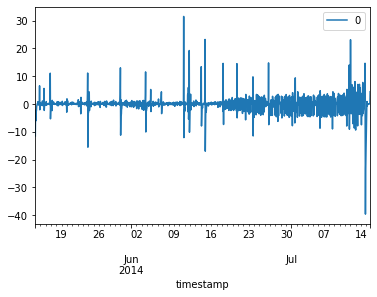

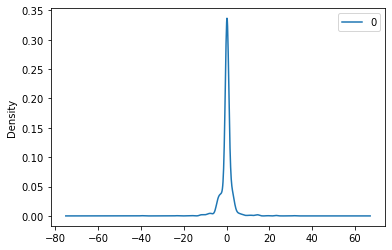

                 0
count  1504.000000
mean     -0.007094
std       3.064243
min     -39.616979
25%      -0.289371
50%       0.136868
75%       0.624902
max      31.509126


In [ ]:
import matplotlib.pyplot
errors = pd.DataFrame(arimaMfit.resid)
errors.plot()
matplotlib.pyplot.show()
errors.plot(kind='kde')
matplotlib.pyplot.show()
print(errors.describe())

In [ ]:
resamp.to_csv(r'C:\\Users\\raksh\\Desktop\\resamp.csv')

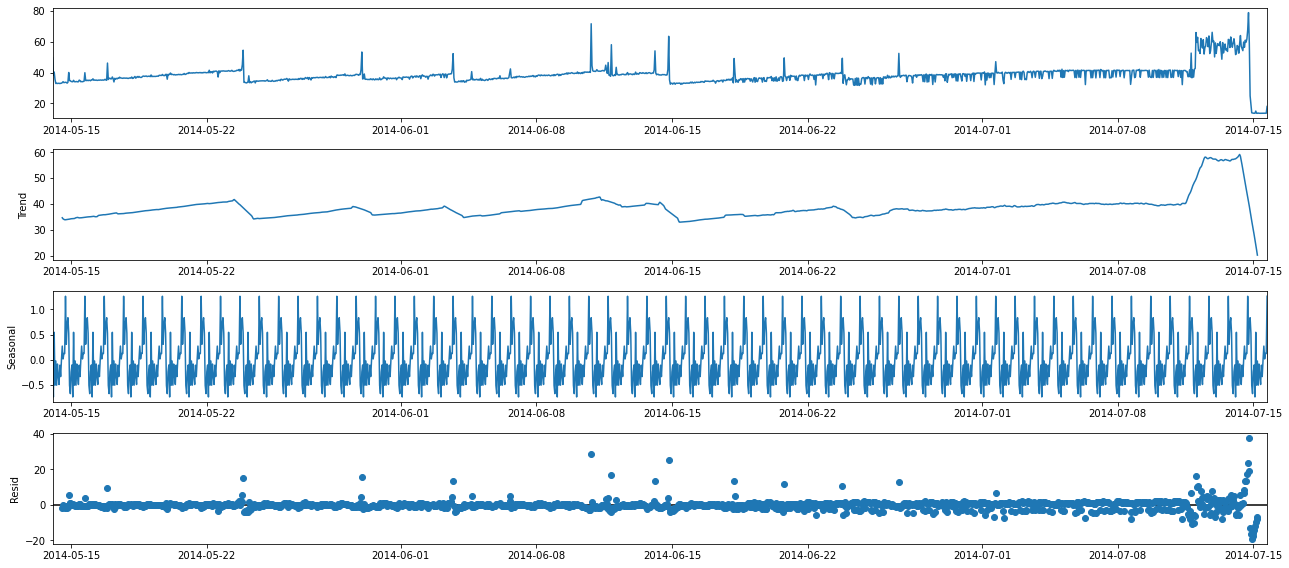

In [ ]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(resamp, model='additive')
fig = decomposition.plot()
plt.show()

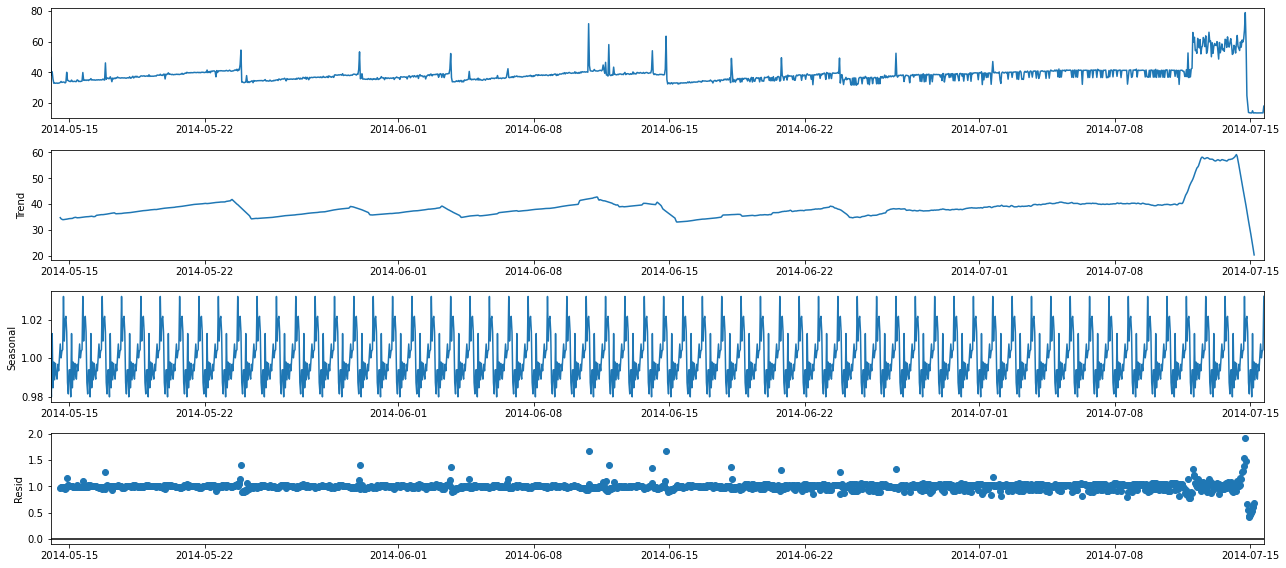

In [ ]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(resamp, model='multiplicative')
fig = decomposition.plot()
plt.show()

## Split the dataset into testing and training

### A function for finding out Mean Absolute Percentage Error

In [ ]:
X = resamp.values
train, test = X[:1350], X[1350:]

#test = X[409:889]
#train = X[200:409]

history = [x for x in train]


def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

### Make Predictions on test data

In [ ]:
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('pred=%f, exp=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = math.sqrt(error)
mae = mean_absolute_error(test, predictions)
error_mape = mean_absolute_percentage_error(test, predictions)
print('Mean Squared Error: %.3f' % error)
print('Root Mean Squared Error: %.3f' % rmse)
print('Mean Absolute Error: %.3f' % mae)
print('Mean Absolute Percantage Error: %.3f' % error_mape)

pred=40.926696, exp=41.161500
pred=40.742804, exp=41.294000
pred=40.781554, exp=41.289417
pred=40.684139, exp=41.403167
pred=41.321142, exp=41.416000
pred=41.346808, exp=41.270750
pred=41.304454, exp=41.165833
pred=41.288249, exp=36.981167
pred=40.160548, exp=41.578000
pred=40.634184, exp=37.278583
pred=39.711773, exp=36.910167
pred=38.806615, exp=36.818000
pred=38.226302, exp=41.368250
pred=38.781543, exp=36.826500
pred=38.351834, exp=41.538583
pred=38.726072, exp=41.462667
pred=39.562438, exp=41.236667
pred=40.042528, exp=36.853583
pred=39.574945, exp=41.565250
pred=39.997456, exp=36.833917
pred=39.640390, exp=41.974667
pred=40.048177, exp=36.690583
pred=39.084052, exp=41.414833
pred=39.274697, exp=41.279250
pred=40.266598, exp=36.783833
pred=38.882675, exp=41.126833
pred=39.922565, exp=36.942917
pred=38.916519, exp=41.354167
pred=39.817720, exp=41.276000
pred=40.075941, exp=36.765333
pred=38.823356, exp=41.383333
pred=39.856400, exp=36.729417
pred=38.955051, exp=41.482750
pred=39.83

### Plot the test data and predicted data

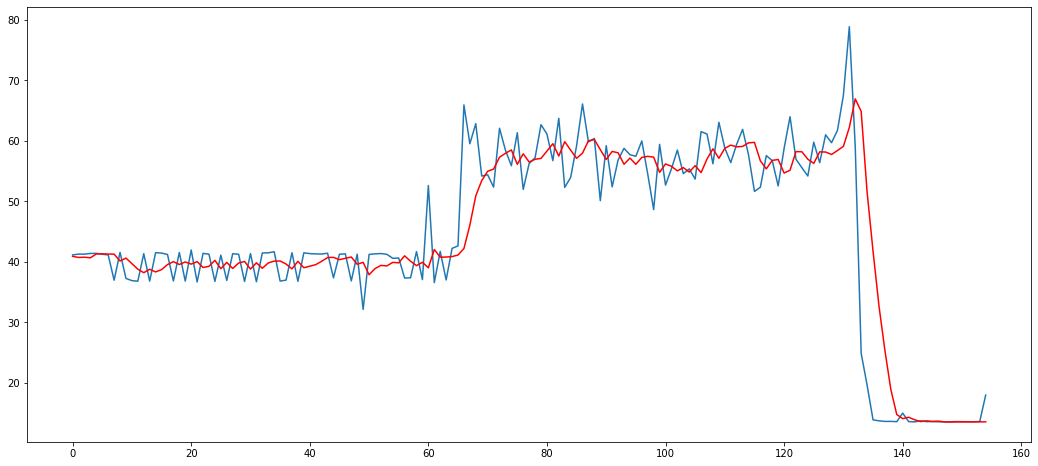

In [ ]:
matplotlib.pyplot.plot(test)
matplotlib.pyplot.plot(predictions, color='red')
matplotlib.pyplot.show()